1. Introduction / Database Intro

The dataset is provided by ZARA.com, and it is categorized uder genders(men/women). In addition, 
under those two categories, the accessories are classified into various categories as well, such as
shirts, pants, trousers, shorts, and etc. To analyze the case, the outcome could be valuable for
marketing and product department of Zara to predict the preference cloth trends for these two groups. 

2. Preprocessing

In [16]:
# Before giving the dataset description, let's imprort the libraries.

# Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Importing 'chardet' to read different target files 'men' & 'women'
import os 
from chardet import detect
import glob

# Importing libraries for visuailzation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing wordcloud for analysis
from wordcloud import WordCloud, STOPWORDS

# Importing WordCloud
from wordcloud import WordCloud

# Create output path to store the further files.
output_path = r'D:\Damon_Kaggle_Projects\Project1_Zara_clothings\Output'


2.1 Preprocessing - Input paths

In [17]:
# Define the main path
input_main_path = r'D:\Damon_Kaggle_Projects\Project1_Zara_clothings'

# Define the categories (Men and Women)
categories = ['Men', 'Women']

# Create DataFrames to store processed data for each category
man_raw_df = pd.DataFrame()
women_raw_df = pd.DataFrame()

# Create dictionaries to store processed data for each category
processed_data = {}

# Loop through the categories (Men and Women)
for category in categories:
    input_path = os.path.join(input_main_path, category)
    allfiles_path = os.listdir(input_path)

    # Create a DataFrame to store the combined data for the category
    category_raw_total_data = pd.DataFrame()

    # Loop through the CSV files in the category folder
    for rd in allfiles_path:
        if rd.endswith('.csv'):
            path_file = os.path.join(input_path, rd)
            raw_data = pd.read_csv(path_file)
            
            # Extract the category name from the file name (excluding the extension)
            category_name = os.path.splitext(rd)[0]
            
            # Create a new "category" column and set it to the category name
            raw_data['category'] = category_name
            
            # Concatenate the data to the category's DataFrame
            category_raw_total_data = pd.concat([category_raw_total_data, raw_data], axis=0)
    
    # Reorder columns and remove duplicate columns
    column_order = ['category'] + [col for col in category_raw_total_data.columns if col != 'category']
    category_raw_total_data = category_raw_total_data[column_order]
    
   # Store the processed data in the respective DataFrame
    if category == 'Men':
        men_raw_df = category_raw_total_data
    elif category == 'Women':
        women_raw_df = category_raw_total_data

men_raw_df


,category,Unnamed: 0,product_name,link,product_images,price,details
0,ACCESSORIES,0,PACK OF 2 STRIPED POPLIN BOXERS,https://www.zara.com/in/en/pack-of-2-striped-p...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 2 pairs of boxers made of poplin fabri...
1,ACCESSORIES,3,PACK OF 2 STRIPED POPLIN BOXERS,https://www.zara.com/in/en/pack-of-2-striped-p...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 2 pairs of boxers made of cotton popli...
2,ACCESSORIES,5,2-PACK OF SHORT POPLIN BOXERS,https://www.zara.com/in/en/2-pack-of-short-pop...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 2 pairs of short boxers made of cotton...
3,ACCESSORIES,7,2-PACK OF BOXERS WITH CUTWORK EMBROIDERY,https://www.zara.com/in/en/2-pack-of-boxers-wi...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 2,590.00",Pack of 2 pairs of boxers made of poplin. Elas...
4,ACCESSORIES,8,3-PACK OF BASIC BOXERS,https://www.zara.com/in/en/3-pack-of-basic-box...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 1,990.00",Pack of 3 pairs of boxers with an elastic wais...
...,...,...,...,...,...,...,...
7,ZARA ORIGINS,8,REGULAR FIT JEANS,https://www.zara.com/in/en/regular-fit-jeans-p...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 4,990.00",Regular fit jeans made of cotton denim. Five p...
8,ZARA ORIGINS,9,CHAMBRAY SHIRT,https://www.zara.com/in/en/chambray-shirt-p075...,[{'https://static.zara.net/photos///2023/I/0/1...,"₹ 5,990.00",Regular-fit spread collar shirt made of cotton...
9,ZARA ORIGINS,10,STRIPED SHIRT,https://www.zara.com/in/en/striped-shirt-p0568...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 4,990.00",Regular fit shirt made of a cotton fabric. Spr...
10,ZARA ORIGINS,13,100% LINEN SUIT TROUSERS,https://www.zara.com/in/en/100-linen-suit-trou...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 5,990.00",Straight fit trousers made of linen. Front poc...


2.2 Data Cleaning - excluding nulls from both DataFrame

In [18]:
# Create copies for raw DataFrames
men_raw_df = men_raw_df.copy()
women_raw_df = women_raw_df.copy()

# Exclude nulls
men_raw_df = men_raw_df.dropna()
women_raw_df = women_raw_df.dropna()

# Drop un-needed columns
men_raw_df.drop(['Unnamed: 0', 'link', ' product_images'], axis=1, inplace=True)
women_raw_df.drop(['Unnamed: 0', 'Link', 'Product_Image'], axis=1, inplace=True)

In [19]:
men_raw_df.to_csv(output_path+r'\men_raw_df.csv')
women_raw_df.to_csv(output_path+r'\women_raw_df.csv')
cleaned_men_df = men_raw_df.copy()
cleaned_women_df = women_raw_df.copy()

In [20]:
# For better understanding of the DataFrame, the price is re-formatted in USD.
# Based on the research, the avg exchange rate = .012 USD.

# Changed 'price' column in men's file
def currency_in_USD(df):
    if 'price' in df.columns:
        df = df.rename(columns = {'price': 'price(USD)'})
    else: 
        df = df.rename(columns = {'Price':'price(USD)'})

    df['price(USD)'] = df['price(USD)'].str.replace(',', '').str.replace('₹', '')
    df['price(USD)'] = df['price(USD)'].replace('Not Found', '0')
    df['price(USD)'] = df['price(USD)'].astype(float)
    df['price(USD)'] = df['price(USD)']* 0.012
    df['price(USD)'] = df['price(USD)'].round(2)
    return df 

cleaned_men_df = currency_in_USD(cleaned_men_df)
cleaned_women_df = currency_in_USD(cleaned_women_df)

3. Questions

- What are the best sellers (Top10) in both categorized files?
- Generate word cloud and find out What (Top10) key words are for men and women groups?

3.1 Top 10 categories and total prices in target DataFrame

In [21]:
def extract_top_categories(dataframe, top_n=10):
     # Count total categories
    top_categories_count = dataframe['category'].value_counts().head(top_n)

    # Create a new DataFrame with the top N categories
    top_categories_df = dataframe[dataframe['category'].isin(top_categories_count.index)]

    # Group by 'category' and calculate the total price for each category
    top_categories_total_price = top_categories_df.groupby('category')['price(USD)'].sum()

    # Combine the count and total price data into a single DataFrame
    result_df = pd.DataFrame({'Count': top_categories_count, 'TotalPrice(USD)': top_categories_total_price})
    result_df = result_df.sort_values(by='TotalPrice(USD)', ascending=False)

    return(result_df)

men_top_10_categories_df = extract_top_categories(cleaned_men_df)
women_top_10_categories_df = extract_top_categories(cleaned_women_df) 

3.2 Pie charts of targets' Top 10 category count

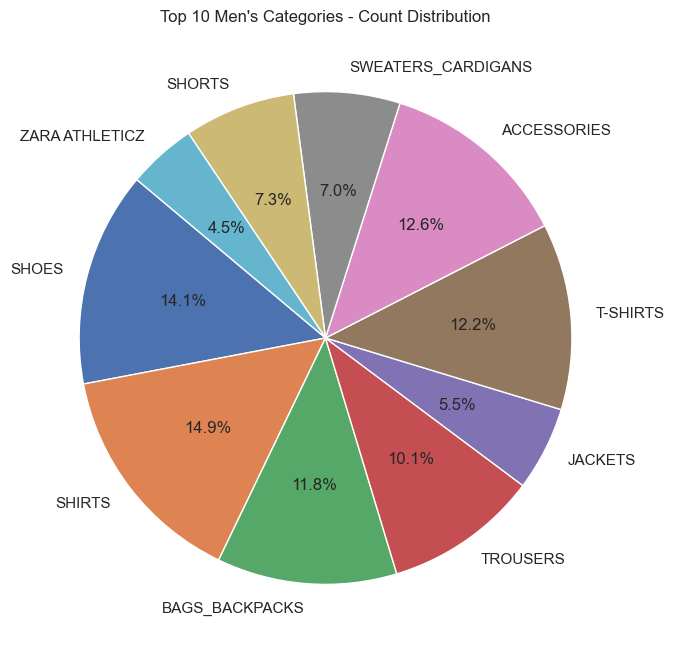

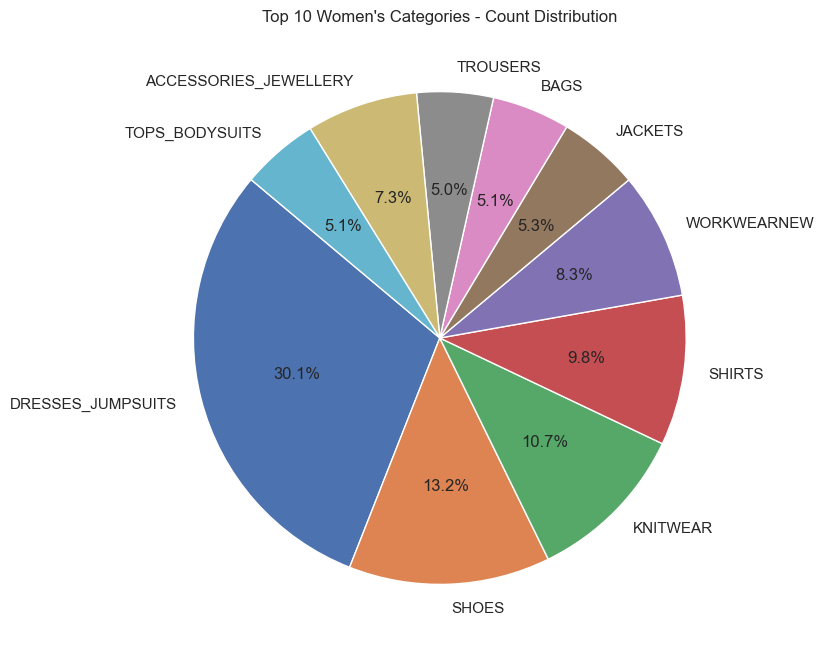

In [22]:
def top10_pie_chart(dataframe, title):
    top_categories = dataframe.index
    category_counts = dataframe['Count']
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels = top_categories, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

top10_pie_chart(men_top_10_categories_df, "Top 10 Men's Categories - Count Distribution")
top10_pie_chart(women_top_10_categories_df, "Top 10 Women's Categories - Count Distribution")

3.3 Bar Chart of Men's Top 10 total price(USD)

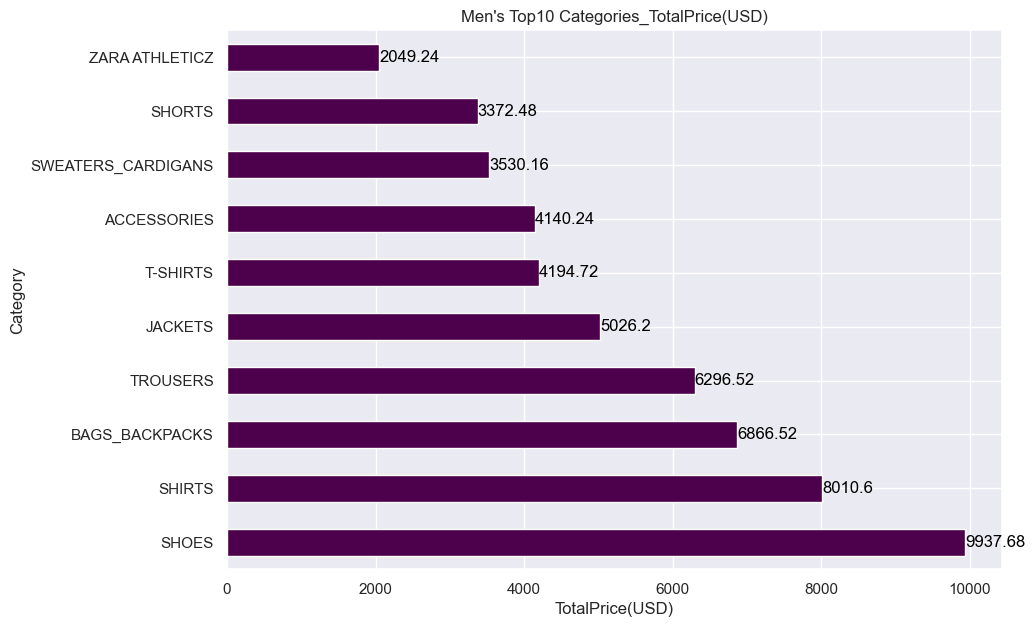

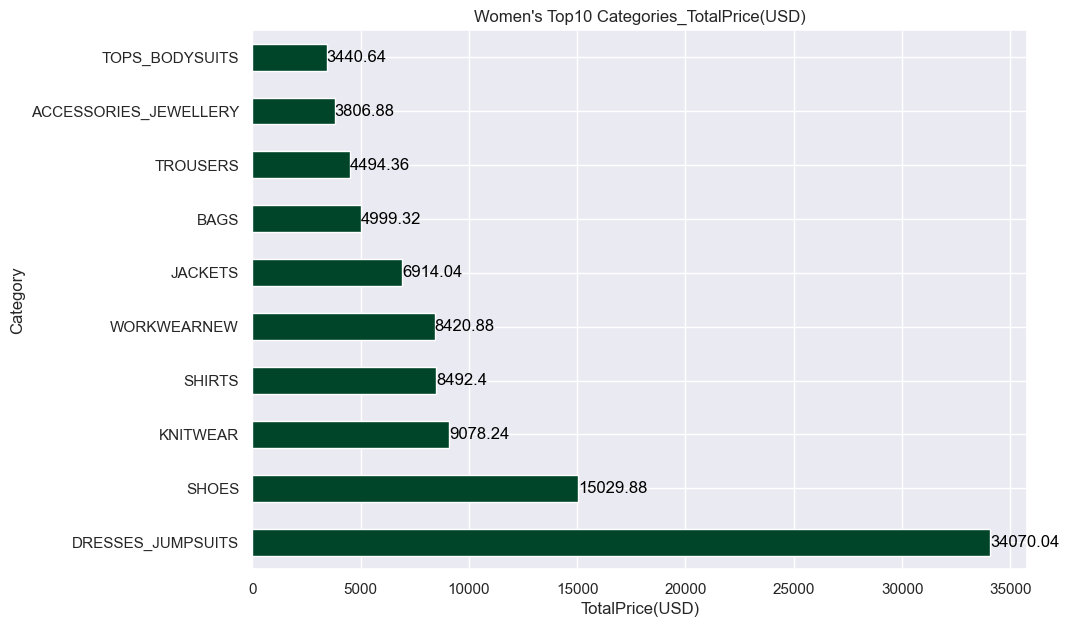

In [23]:
def top10_plot_chart(dataframe, title, color_index):
    colors = ['BuPu', 'BuPu_r', 'YlGn', 'YlGn_r']
    plt.figure(figsize=(10, 7))
    ax = dataframe['TotalPrice(USD)'].plot(kind='barh', colormap=colors[color_index])
    plt.title(title)
    plt.xlabel('TotalPrice(USD)')
    plt.ylabel('Category')
    for i, v in enumerate(dataframe['TotalPrice(USD)']):
        rounded_v = round(v, 2)  # Round to two decimal places
        ax.text(rounded_v + 1, i, str(rounded_v), color='black', va='center')
    plt.show()  

top10_plot_chart(men_top_10_categories_df, "Men's Top10 Categories_TotalPrice(USD)", 1)
top10_plot_chart(women_top_10_categories_df, "Women's Top10 Categories_TotalPrice(USD)", 3)

3.4 Avg Spending between Targets

In [24]:
# Create a DataFrame storing the products counts between men and women
total_product_count = {'gender': ['Men','Women'], 
                        'product_counts':[cleaned_men_df['product_name'].count(),
                        cleaned_women_df['Product_Name'].count()]}
total_product_count = pd.DataFrame(total_product_count)

# Create new DataFrame Storng total money spending between two groups as total_price_spending

total_price_spending = {'gender': ['Men', 'Women'], 
                        'total_spending_USD': [cleaned_men_df['price(USD)'].sum(), 
                        cleaned_women_df['price(USD)'].sum()]}
total_price_spending = pd.DataFrame(total_price_spending)

# Create a new DataFrame to store the needed info for analysis

avg_product_Spending={'gender':['men', 'women'], 
                      'avg_product_price_USD':[round(cleaned_men_df['price(USD)'].mean(),2),
                      round(cleaned_women_df['price(USD)'].mean(),2)]}  

avg_product_Spending = pd.DataFrame(avg_product_Spending)

print(total_product_count)
print(total_price_spending)
print(avg_product_Spending)

  gender  product_counts
0    Men            1475
1  Women            2704
  gender  total_spending_USD
0    Men            66558.12
1  Women           120617.76
  gender  avg_product_price_USD
0    men                  45.12
1  women                  44.61


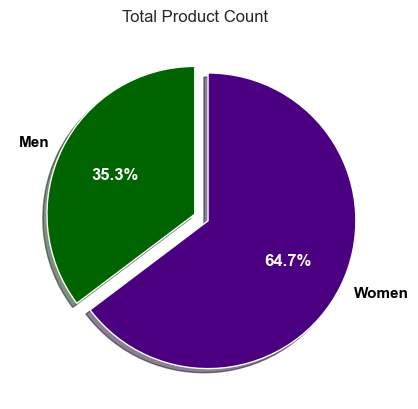

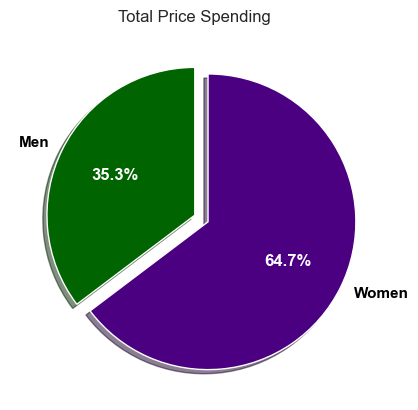

In [25]:
# Pie Chart of Comparison between target groups in two dimensions: total_product_count & total_price_spending

def plot_pie_chart(dataframe, title):
    explode = [0, 0.1]
    _, _, autotexts = plt.pie(total_product_count.product_counts, labels=total_product_count.gender,
                            explode=explode, colors=['darkgreen', 'indigo'], shadow=True, startangle=90,
                            autopct='%1.1f%%', textprops={'color': 'black', 'weight': 'bold'})

    # adding the internal labels
    for autotext in autotexts:
        autotext.set_color('white') # choosing the internal label color

    plt.title(title)
    plt.show()

plot_pie_chart(total_product_count, "Total Product Count")
plot_pie_chart(total_price_spending, "Total Price Spending")

3.5 Generate World Cloud

In [26]:
# Re-format the feature of 'details'
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = ''.join([char for char in text if char.isalpha() or char.isspace()])
        text = ' '.join([word for word in text.split() if word not in STOPWORDS])
        return text
    else:
        return ''  # Return an empty string for non-string values


In [27]:
# Concatenate products' descirption in men's and women's data
all_men_descriptions = ' '.join(cleaned_men_df['details'].apply(clean_text))
all_women_descriptions = ' '.join(cleaned_women_df['Details'].apply(clean_text))

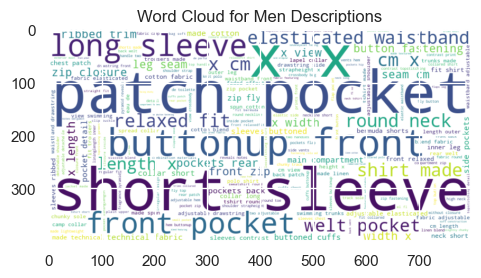

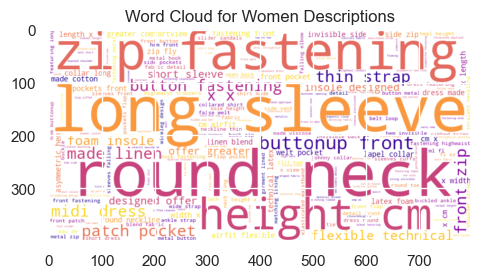

In [28]:
# Generate WordCloud for targets

def generate_wordcloud(descriptions, title, colormap='viridis'):

    wordcloud = WordCloud(
        width=800, height=400, background_color='white', colormap=colormap, relative_scaling=0
    ).generate(descriptions)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.show()

    return wordcloud

# Example usage
wordcloud_men = generate_wordcloud(all_men_descriptions, "Word Cloud for Men Descriptions")
wordcloud_women = generate_wordcloud(all_women_descriptions, "Word Cloud for Women Descriptions", colormap='plasma')

In [29]:
# Extract word frequencies for each group

men_word_frequencies = wordcloud_men.words_
women_word_frequencies = wordcloud_women.words_

# Get the top 10 words for men and women
top_10_men_words = list(men_word_frequencies.keys())[:10]
top_10_women_words = list(women_word_frequencies.keys())[:10]

# Top 10 frequencies word for men and women
print(f'Top 10 Words for Man: {top_10_men_words}')
print(f'Top 10 Words for Women:{top_10_women_words}')


Top 10 Words for Man: ['short sleeve', 'patch pocket', 'x x', 'buttonup front', 'long sleeve', 'front pocket', 'elasticated waistband', 'shirt made', 'round neck', 'relaxed fit']
Top 10 Words for Women:['long sleeve', 'round neck', 'zip fastening', 'height cm', 'buttonup front', 'button fastening', 'patch pocket', 'midi dress', 'x x', 'made linen']


4. Summary

Based on the charts above, male customer groups are more into products in the categories of shirts and shoes, which are 14.1% and 14.9% of the total distribution. For the women group, jumpsuits are the largest part of the category, which takes 30.1% that are more attracting female customers. Additionally, even though there is no difference between avg product price of the target groups, the women group is the largest consumer group compared to the men group, and the total spending is nearly two times bigger than men's total spending, which is 64.4%.

Based on the word cloud analysis, for male customers they are more willings to purchase the clothes with the features such as sleeve lengths, pockets, relaxed fit, etc. In the other hand, females are more into the features like linen-made clothes, fastening zip, long sleeve, buttonup front, etc. 